In [1]:

from zipfile import ZipFile
import os
# The data directory is currently hard-coded, if you want to train in different location you need to change it: 
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
# then you need to re-import it 
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import torch
import numpy as np
from PIL import Image  # to display images
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics YOLOv8.0.207  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Setup complete  (24 CPUs, 63.8 GB RAM, 406.2/930.7 GB disk)


Setup complete. Using torch 2.0.1 on device (NVIDIA GeForce RTX 3090)


# Load a model

In [2]:
# Load a model
model = YOLO("yolov8s-seg.pt")  # load a pretrained model

In [3]:
model

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_runnin

# Use the model

In [4]:
# Use the model
results = model.predict(source="https://ultralytics.com/images/bus.jpg", conf=0.25) 


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\kovac\Desktop\DND_Labor\Labor 10\bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 skateboard, 66.2ms
Speed: 3.0ms preprocess, 66.2ms inference, 16.6ms postprocess per image at shape (1, 3, 640, 480)


### Let's see what the "results" contain

In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [6]:
results[0].boxes.xyxy

tensor([[5.1426e+01, 3.9802e+02, 2.4646e+02, 9.0317e+02],
        [6.6840e+02, 3.9336e+02, 8.0955e+02, 8.7632e+02],
        [2.2226e+02, 4.0550e+02, 3.4571e+02, 8.6008e+02],
        [2.1634e+01, 2.2947e+02, 8.0414e+02, 7.4867e+02],
        [3.1305e-01, 5.4515e+02, 7.6506e+01, 8.7437e+02],
        [2.8496e+02, 4.8044e+02, 3.0199e+02, 5.2454e+02],
        [6.6887e+02, 8.2730e+02, 8.0940e+02, 8.8368e+02]], device='cuda:0')

In [7]:
results[0].boxes.conf

tensor([0.9012, 0.8872, 0.8870, 0.8708, 0.7319, 0.3927, 0.3076], device='cuda:0')

In [8]:
results[0].boxes.cls

tensor([ 0.,  0.,  0.,  5.,  0., 27., 36.], device='cuda:0')

In [9]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,

In [10]:
im_array = results[0].masks.data.cpu().numpy()

In [11]:
np.shape(im_array)

(7, 640, 480)

In [12]:
results[0].masks.shape[0]

7

In [13]:
(width,height)=np.shape(results[0].masks.data.detach().cpu().numpy()[0,:,:])

## Let's display the results

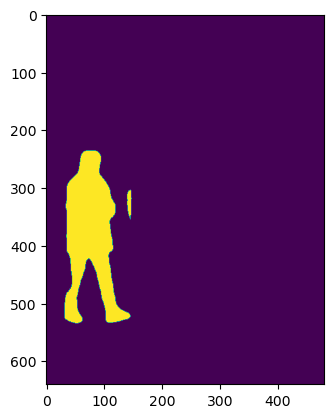

In [14]:
plt.imshow(results[0].masks.data.detach().cpu().numpy()[0,:,:])

In [15]:
def get_colored_mask(mask):

    colors = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    r[mask == 1], g[mask == 1], b[mask == 1] = colors[random.randrange(0,10)]
    colored_mask = np.stack([r, g, b], axis=2)
    return colored_mask

In [16]:
img = cv2.imread("bus.jpg")
img = cv2.resize(img, (height,width), interpolation = cv2.INTER_AREA)
np.shape(img)

(640, 480, 3)

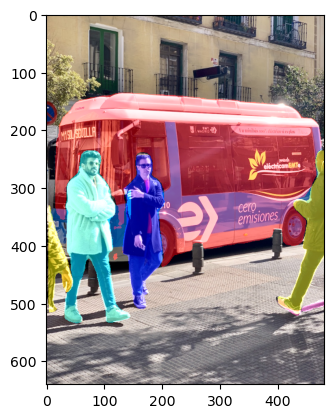

In [17]:
img = cv2.imread("bus.jpg")
img = cv2.resize(img, (height,width), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for r in range(results[0].masks.shape[0]):
    im_array = results[0].masks.data[r,:,:].cpu().numpy()
    rgb_mask = get_colored_mask(results[0].masks.data.detach().cpu().numpy()[r,:,:])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0) 
img = Image.fromarray(img)  # RGB PIL image
plt.imshow(img)
img.show()  # show image

# Let's see how can we train the model

This model works with polygon masks!

In [18]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=10)  # train the model

Ultralytics YOLOv8.0.207  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128-seg.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

       5/10      3.24G       1.17      2.629      1.472      1.202         96        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP
                   all        128        929      0.607      0.583      0.608      0.446      0.558      0.518      0.547      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
       6/10      3.19G      1.174       2.66      1.439      1.193        120        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP
                   all        128        929      0.613      0.557      0.615      0.454      0.589      0.494      0.556      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
       7/10      3.17G      1.147      2.659      1.364      1.179        

                  fork        128          6      0.513      0.167       0.29      0.222      0.548      0.167      0.281      0.124
                 knife        128         16      0.608        0.5      0.579      0.402       0.68        0.5      0.507      0.354
                 spoon        128         22      0.608      0.273      0.418      0.274      0.648      0.273       0.41      0.173
                  bowl        128         28      0.618      0.786       0.76      0.605      0.611      0.714      0.684      0.376
                banana        128          1      0.136          1      0.199      0.073          0          0     0.0663     0.0265
              sandwich        128          2      0.428          1      0.995      0.995      0.444          1      0.995      0.635
                orange        128          4          1      0.478       0.87       0.58          1      0.367       0.87      0.516
              broccoli        128         11      0.391      0.182   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C78C23A950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02